In [1]:
import cv2 as cv
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
def PCA_SIFT(nombre, n_components, mostrar_imagen=True):
    # Cargar la imagen en escala de grises
    I = cv.imread(nombre, 0)
    if I is None:
        raise ValueError(f"No se pudo cargar la imagen: {nombre}")

    # Inicializar el detector SIFT
    sift = cv.SIFT_create()

    # Detectar puntos clave y calcular descriptores SIFT
    keypoints, descriptors = sift.detectAndCompute(I, None)

    if descriptors is None or len(descriptors) == 0:
        raise ValueError("No se encontraron puntos clave en la imagen.")

    # Normalización de los descriptores para PCA
    descriptors = descriptors.astype(np.float32)
    descriptors /= np.linalg.norm(descriptors, axis=1, keepdims=True)

    # Aplicar PCA para reducir la dimensionalidad del descriptor SIFT
    pca = PCA(n_components=n_components)
    descriptors_pca = pca.fit_transform(descriptors)  # Reducción de PCA

    # Mostrar la imagen con los puntos clave si se requiere
    if mostrar_imagen:
        # Dibujar los puntos clave en la imagen
        imagen_con_puntos = cv.drawKeypoints(
            I, keypoints, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
        )

        
        plt.figure(figsize=(10, 10))
        plt.imshow(imagen_con_puntos, cmap='gray')
        plt.title("Imagen con Puntos Clave")
        plt.axis('off')  # Eliminar ejes
        plt.show()  # Mostrar la imagen

    # Retornar el vector de características final
    return descriptors_pca

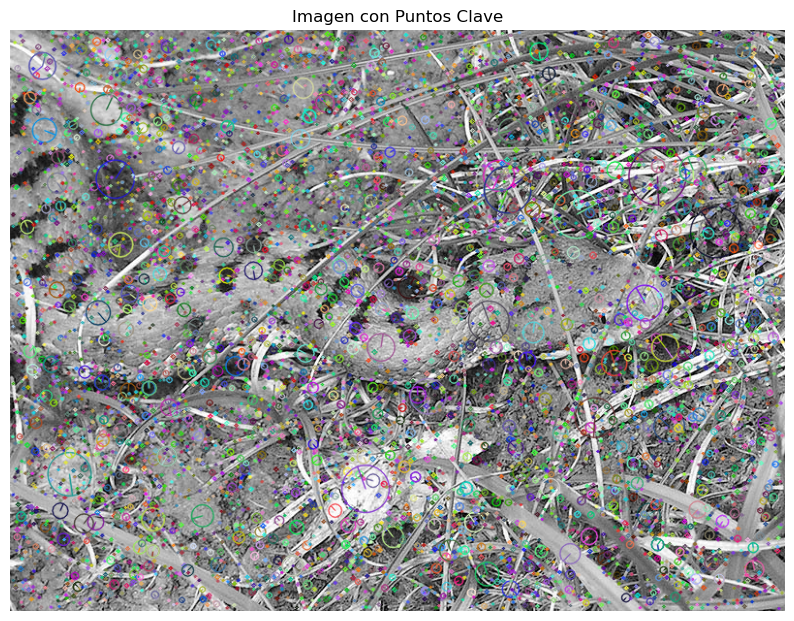

Tamaño del vector de características: (8306, 20)
Vector de características PCA-SIFT:
[[ 0.32640588 -0.06846954 -0.09859465 ...  0.00835481  0.01343231
  -0.04498285]
 [-0.37922448 -0.06632507 -0.20853896 ...  0.11552788 -0.14504588
   0.06030028]
 [ 0.1821682   0.02978378 -0.24873447 ... -0.07882378  0.04376921
   0.01937714]
 ...
 [ 0.40437624  0.16190313  0.2560943  ... -0.01130445  0.11895522
  -0.10620023]
 [ 0.29078886 -0.04026511  0.01994723 ...  0.10376356 -0.01609525
  -0.0210692 ]
 [-0.28274783  0.00396137  0.08626677 ...  0.02830799 -0.08720392
   0.15034543]]


In [ ]:
nombre = '11.jpg'
vcaracteristicas = PCA_SIFT(nombre,20)

print(f"Tamaño del vector de características: {vcaracteristicas.shape}")
print("Vector de características PCA-SIFT:")
print(vcaracteristicas)
#Prueba Final